## 1. 

获取NGC星表

In [2]:
from astropy.coordinates import SkyCoord
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import astropy.units as u

In [32]:
Pos = SkyCoord.from_name('NGC 7840')
POS = []
for i in tqdm(np.arange(1,7841)):
    POS.append(SkyCoord.from_name('NGC'+str(i)))
np.save("NGC_POS",POS)

100%|██████████| 7840/7840 [1:35:28<00:00,  1.37it/s]  


将NGC星表坐标画在天球上

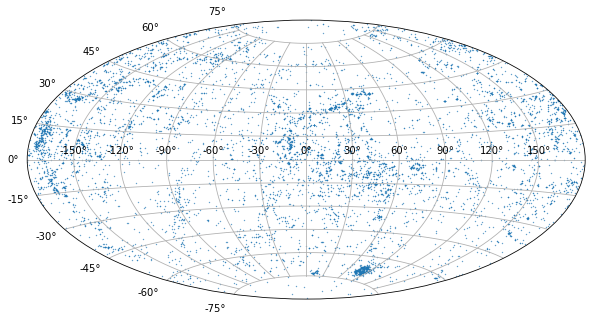

In [15]:

data = np.load('NGC_POS.npy', allow_pickle=True)
ra = []
dec = []
#print(data[0].ra)
for i in np.arange(len(data)):
    ra.append(data[i].ra)
    dec.append(data[i].dec)
gal = SkyCoord(ra, dec, frame='galactic', unit=u.deg)
plt.figure(figsize=(10,10))
plt.subplot(111, projection='aitoff')
plt.grid(True)
plt.scatter(gal.l.wrap_at('180d').radian, gal.b.radian, s=0.1)
plt.savefig("ICRS",dpi=100)

获取virgo星团星表

In [ ]:
Pos_v = SkyCoord.from_name('VCC 2096')

Virgo_POS = []
for i in tqdm(np.arange(1, 2097)):
    Virgo_POS.append(SkyCoord.from_name('VCC ' + str(i)))

np.save("Virgo_POS", Virgo_POS)

将Virgo星团坐标画在天球上

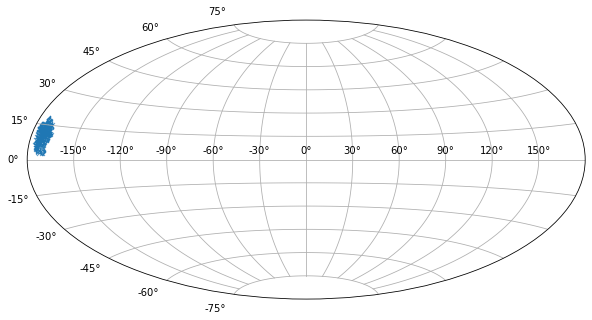

In [5]:

data_v = np.load('Virgo_POS.npy', allow_pickle=True)
ra_v = []
dec_v = []
#print(data[0].ra)
for i in np.arange(len(data_v)):
    ra_v.append(data_v[i].ra)
    dec_v.append(data_v[i].dec)
gal_v = SkyCoord(ra_v, dec_v, frame='galactic', unit=u.deg)
plt.figure(figsize=(10,10))
plt.subplot(111, projection='aitoff')
plt.grid(True)
plt.scatter(gal_v.l.wrap_at('180d').radian, gal_v.b.radian, s=0.1)
plt.savefig("ICRS",dpi=100)

### good~

## 2. 

In [ ]:
from astropy.coordinates import SkyCoord
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u

### 2.1 没能画出圆

球面三角形中，$cosa=cosAsinbsinc + cosbcosc$。从视场中心(110,30)向四周以2.5度为半径在球面上；  
$cos2.5 = cos(x-110)sin(90-y)sin60-coss(90-y)cos60$  

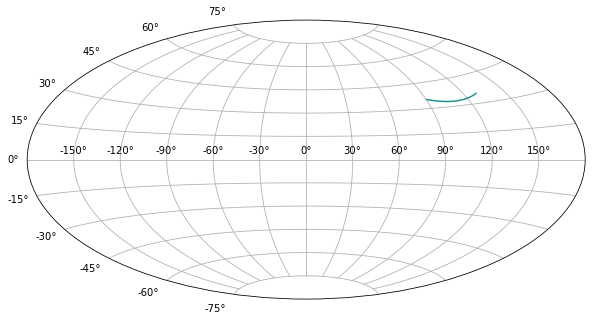

In [22]:
ra = 110*np.pi/180
dec = 30*np.pi/180
x = np.arange(90,130,0.1)*np.pi/180
y = np.arange(20,40,0.1)*np.pi/180
x,y = np.meshgrid(x,y)
z = np.pi/2-y-np.cos(x-ra)*np.sin(np.pi/2-y)*np.sin(np.pi/2-dec)-np.cos(np.pi/2-y)*np.cos(np.pi/2-dec)
plt.figure(figsize=(10,10))
plt.subplot(111,projection="aitoff")
plt.grid(True)            
plt.contour(x,y,z,0)
#x_1=np.linspace(-np.pi,np.pi,13)
#x_2=[str(x)+"°" for x in range(-150,180,30)]
#x_2[0]=None
#plt.xticks(x_1,x_2)
plt.savefig("lamost",dpi=100)
plt.show()


### 2.2 用astropy的包画

In [9]:
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.visualization.wcsaxes import SphericalCircle
from astropy.visualization.wcsaxes.frame import EllipticalFrame
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
from astropy.wcs import WCS
from astropy.visualization import simple_norm

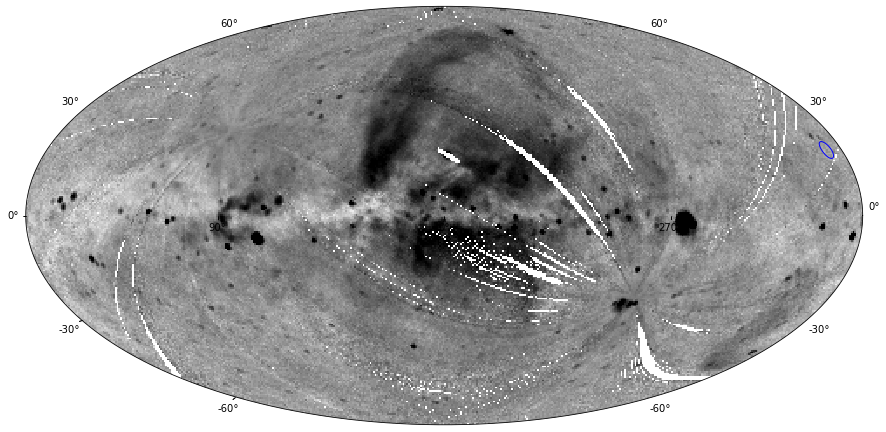

"\ns = SphericalCircle(skycoord_object,2.5 * u.degree,\n                        edgecolor='white', facecolor='none',\n                         transform=ax.get_transform('fk5'))\nTypeError: get_transform() takes 1 positional argument but 2 were given\n"

In [10]:
filename = get_pkg_data_filename('allsky/allsky_rosat.fits')
hdu = fits.open(filename)[0]
wcs = WCS(hdu.header)
data = hdu.data

plt.figure(figsize=(15, 10))
ax = plt.subplot(projection=wcs, frame_class=EllipticalFrame)
im = ax.imshow(data, origin='lower', cmap='gray_r', interpolation='none',
               norm=simple_norm(data, stretch='asinh', max_percent=99.5, min_percent=1))
skycoord_object = SkyCoord(110 * u.deg, 30 * u.deg)
s = SphericalCircle(skycoord_object,radius=2.5*u.deg,
                    edgecolor='blue', facecolor='none',
                    transform=ax.get_transform('icrs'))
ax.add_patch(s)
plt.show()
"""
s = SphericalCircle(skycoord_object,2.5 * u.degree,
                        edgecolor='white', facecolor='none',
                         transform=ax.get_transform('fk5'))
TypeError: get_transform() takes 1 positional argument but 2 were given
"""



### 自己实现的方法参见 http://cluster.shao.ac.cn/~shen/wiki/index.php?title=%E5%A4%A9%E5%9B%BE%E6%8A%95%E5%BD%B1%E4%B8%8A%E7%9A%84%E5%9C%86

## 3.
1>
由$L_{MW}\backsim 10^{11}L_{sun}$,和$m_1-m_2 = -2.5\times lg(\frac{F_1}{F_2})$,  
$\to\ $ $m_{MW}-m_{sun}=-2.5\times lg(10^{11})$  
$\to\ $ $m_{MW} = 4.8-27.5 = -22.7mag$  

2>
$\theta = arctan\frac{Re}{d} = arctan0.05 = 0.0499\times 180/\pi\ deg = 2.859 deg = 10292.614''$  

3>surface brightness $=m+2.5lg(\pi r^2)= -22.7+2.5lg(10292.614^2\pi) = -1.39\ magarcsec^{-2}$  

4> 与距离无关，表面亮度不改变


